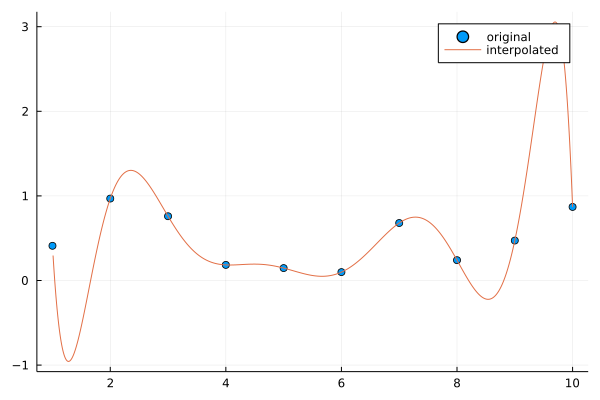

In [13]:
#zadanie 1
using Plots
using Random

function f(xs, ys, x)
    val = 0
    for i in xs
        y = ys[i]
        el = 1
        for x_i in xs
            if i != x_i
                el = el * (x - x_i)/(i - x_i)
            end
        end
        val = val + y * el
    end
    return val
end

xs = 1:10
ys = [rand() for x in xs]
interpolated_xs = [1 + 0.01*i for i in 1:900]
interpolated_ys = [f(xs, ys, interpolated_xs[i]) for i in 1:900]
scatter(xs, ys, label = "original")
plot!(interpolated_xs, interpolated_ys, label = "interpolated")


[0.2228102368960816, 0.6659260478052899, 0.14096482123603793, 0.5207217434755618, 0.08730748719884396, 0.30795592421274187, 0.9060826832026531, 0.06757376372446744, 0.31789037453235314, 0.2185062549341682]


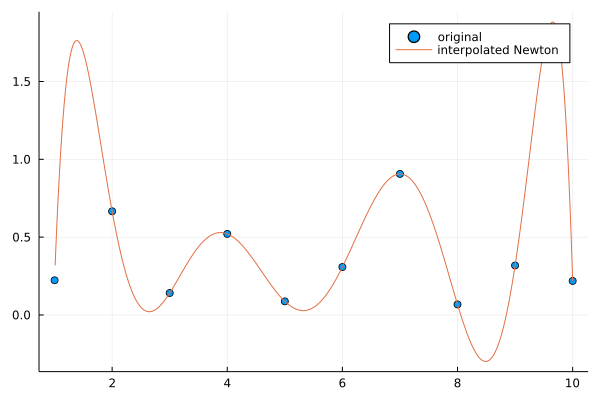

In [55]:
#zadanie 2
using Plots
using Random

function horner(f, xs, x)
    n = length(xs)
    el = 1
    sum = f[1]
    for i in 2:n
        el  = el * (x - xs[i - 1])
        sum = sum + f[i] * el
    end
    return sum
end

function f_coefficients(xs, ys)
    n = length(xs)
    T = zeros(Float32, (n,n))
    for i in 1:n
        T[i,1] = ys[i] 
    end
    for col in 2:n
        for row in 2:(n-col+2)
            T[row-1,col] = (T[row,col-1] - T[row-1,col-1])/(xs[row+col-2] - xs[row-1])
        end
    end
    return [T[1,i] for i in 1:n]
end

xs = 1:10
ys = [0.2228102368960816, 0.6659260478052899, 0.14096482123603793, 0.5207217434755618, 0.08730748719884396, 0.30795592421274187, 0.9060826832026531, 0.06757376372446744, 0.31789037453235314, 0.2185062549341682]
#ys = [rand() for x in xs]
fun = f_coefficients(xs, ys)
interpolated_xs = [1 + 0.01*i for i in 1:900]
interpolated_ys_newt = [horner(fun, xs, interpolated_xs[i]) for i in 1:900]
interpolated_ys_lagrange = [f(xs, ys, interpolated_xs[i]) for i in 1:900]
scatter(xs, ys, label = "original")
#plot!(interpolated_xs, interpolated_ys_lagrange, label = "interpolated Lagrange")
#plot!(interpolated_xs, interpolated_ys_newt, label = "interpolated Newton")
plot!([interpolated_xs interpolated_xs], [interpolated_ys_newt interpolated_ys_newt], label = ["interpolated Newton" "interpolated Lagrange"])

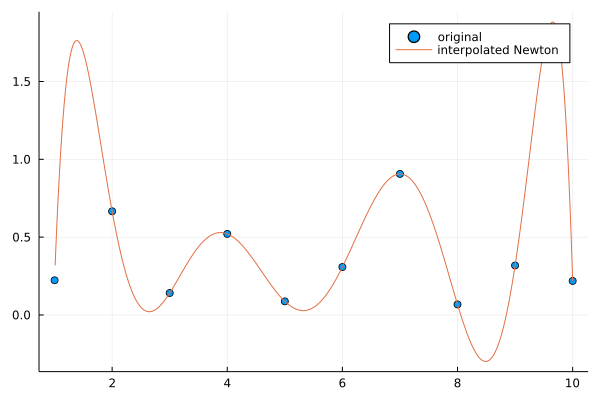

In [68]:
#zadanie 3
using Plots
using Random
using Polynomials

xs = 1:10
ys = [0.2228102368960816, 0.6659260478052899, 0.14096482123603793, 0.5207217434755618, 0.08730748719884396, 0.30795592421274187, 0.9060826832026531, 0.06757376372446744, 0.31789037453235314, 0.2185062549341682]
#ys = [rand() for x in xs]
fun = f_coefficients(xs, ys)
interpolated_xs = [1 + 0.01*i for i in 1:900]
interpolated_ys_newt = [horner(fun, xs, interpolated_xs[i]) for i in 1:900]
interpolated_ys_lagrange = [f(xs, ys, interpolated_xs[i]) for i in 1:900]
scatter(xs, ys, label = "original")
poly = fit(xs, ys)
#plot!(interpolated_xs, interpolated_ys_lagrange, label = "interpolated Lagrange")
#plot!(interpolated_xs, interpolated_ys_newt, label = "interpolated Newton")
plot!(poly, extrema(xs)..., label = "interpolated Polynomials")
#plot!([interpolated_xs interpolated_xs], [interpolated_ys_newt interpolated_ys_newt], label = ["interpolated Newton" "interpolated Lagrange"])
